In [113]:
#정규표현식을 사용하지 않은 것
data = """
park  800905-1049118
kim   700905-1059118
"""

result = []
for line in data.split('\n'):
  word_result = []
  for word in line.split(" "):
    if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
      word = word[:6] + '-' + '*******'
    word_result.append(word)
  result.append(" ".join(word_result))
print('\n'.join(result))


park  800905-*******
kim   700905-*******



In [114]:
#정규 표현식을 사용한 것
import re

data = """
park  800905-1049118
kim   700905-1059118
"""

pat = re.compile("(\d{6})[-]\d{7}")
print(pat.sub("\g<1>-*******", data))


park  800905-*******
kim   700905-*******



#1. 정규 표현식의 기초, 메타문자

**1.1 문자 클래스[ ]**

'[ ] 사이의 문자들과 매치'

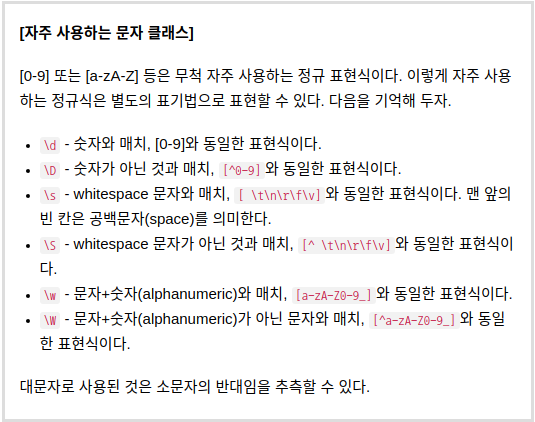

**1.2 Dot(.)**

줄바꿈 문자인 \n을 제외한 모든 문자와 매치됨

**1.3 반복(*)**

ca*t: *바로 앞에 있는 문자 a가 0부터 무한대로 반복될 수 있음. (반복회수 0부터)

**1.4 반복(+)**

ca+t: 최소 1번 이상 반복될 때 사용한다. (반복회수 1부터)

**1.5반복({m,n}, ?)**

반복 회수를 m~n까지 고정.

cat{2}t: "c + a(반드시 2번 반복) + t"

ca{2,5}t: "c + a(2~5번 반복) + t"

ab?c: "a + b(있어도 되고 없어도 된다) + c"

#2. 파이썬에서 정규 표현식을 지원하는 re 모듈

In [115]:
import re         #re(regular expression의 약어)
p = re.compile('ab*')

#3. 정규식을 이용한 문자열 검색

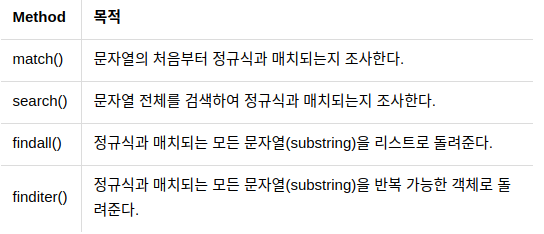

In [116]:
p = re.compile('[a-z]+')

**3.1 match**

In [117]:
m = p.match('python')
print(m)

<re.Match object; span=(0, 6), match='python'>


In [118]:
m = p.match('3 python')
print(m)

None


In [119]:
p = re.compile('[a-z]+')
m = p.match( 'string goes here' )
if m:
  print('Match found', m.group())
else:
  print('No match')

Match found string


**3.2 search**

In [120]:
m = p.search('python')
print(m)

<re.Match object; span=(0, 6), match='python'>


In [121]:
m = p.search('3 python')
print(m)          # "3 " 이후의 "python" 문자열과 매치된다.

<re.Match object; span=(2, 8), match='python'>


**3.3 findall**

In [122]:
result = p.findall('life is too short')
print(result)     #'life', 'is', 'too', 'short' 단어를 각각 [a-z]+ 정규식과 매치해서 리스트로 돌려준다.

['life', 'is', 'too', 'short']


**3.4 finditer**

In [123]:
result = p.finditer('life is too short')
print(result)
for r in result: print(r)

<re.Match object; span=(0, 4), match='life'>
<re.Match object; span=(5, 7), match='is'>
<re.Match object; span=(8, 11), match='too'>
<re.Match object; span=(12, 17), match='short'>


#4. match 객체의 메서드

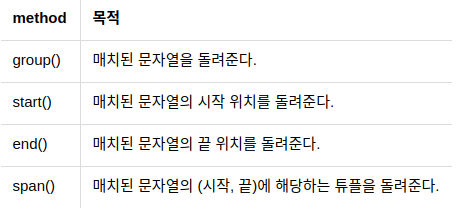

In [124]:
m = p.match('python')

In [125]:
m.group()

'python'

In [126]:
m.start()

0

In [127]:
m.end()

6

In [128]:
m.span()

(0, 6)

In [129]:
m = p.search('3 python')

In [130]:
m.group()

'python'

In [131]:
m.start()

2

In [132]:
m.end()

8

In [133]:
m.span()

(2, 8)

In [134]:
# 이런 꼴로 정규 표현식을 사용했지만, 
p = re.compile('[a-z]+')
m = p.match('python')

In [135]:
# 이렇게 축약해서 사용이 가능함.
m = re.match('[a-z]+', 'python')

#5. 컴파일 옵션

**5.1 DOTALL,S**

In [136]:
p = re.compile('a.b')
m = p.match('a\nb')
print(m)

None


In [137]:
# (.)메타 문자는 줄바꿈 문자(\n)를 제외한 모든 문자와 매치되는 규칙이 있다.
# (\n)문자도 포함하여 매치하고 싶다면, 아래의 옵션을 사용하자.
p = re.compile('a.b', re.DOTALL)
m = p.match
print(m)

<built-in method match of re.Pattern object at 0x7f50c920bf30>


**5.2 IGNORECASE, I**

In [138]:
p = re.compile('[a-z]', re.I)

In [139]:
p.match('python')

<re.Match object; span=(0, 1), match='p'>

In [140]:
p.match('Python')

<re.Match object; span=(0, 1), match='P'>

In [141]:
p.match('PYTHON')

<re.Match object; span=(0, 1), match='P'>

**5.3 MULTILINE, M**

re.MULTILINE 옵션은 ^, $ 메타문자를 문자열의 각 줄마다 적용해 주는 것이다.

In [142]:
# 메타문자 ^: 문자열의 처음을 의미; ^python: 문자열의 처음은 항상 python으로 시작해야 매치함.
# 메타문자 $: 문자열의 마지막을 의미; python$: 문자열의 마지막은 항상 python으로 끝나야 매치함.

p = re.compile("^python\s\w+")
  # python이라는 문자열로 시작하고, 그 뒤에 whitespace, 그 뒤에 단어가 와야 한다는 의미

data = """python one
life is too short
python two
you need python
python three"""

print(p.findall(data))
  # ^ 메타문자에 의해 python이라는 문자열을 사용한 첫 번째 줄만 매치된 것이다.

['python one']


In [143]:
# ^ 메타 문자를 각 라인의 처음으로 인식 시키고 싶은 경우
p = re.compile("^python\s\w+", re.MULTILINE)

data = """python one
life is too short
python two
you need python
python three"""

print(p.findall(data))

['python one', 'python two', 'python three']


**5.4 VERBOSE, X**

In [144]:
charref = re.compile(r'&[#](0[0-7]+|[0-9]+|x[0-9a-fA-F]+);')

In [145]:
charref = re.compile(r"""
&[#]
(
    0[0-7]+
  | [0-9]+
  | x[0-9a-fA-F]+
)
;
""", re.VERBOSE)

#re.VERBOSE 옵션을 사용하면 문자열에 사용된 whitespace는 컴파일할 때 제거된다.
#단, [] 안에 사용한 whitespace는 제외

#6. 백슬래시 문제

In [146]:
# '\'를 표시하려면 정규식 안에 '\\'처럼 두 개를 입력해야한다.
p = re.compile(r'\\section')
# 위와 같이 정규식 문자열 앞에 r문자를 삽입하면 이 정규식은 Raw String 규칙에 의하여
# 백 슬래시 2개 대신 1개만 써도 2개를 쓴 것과 동일한 의미를 갖게 된다.

#1. 메타문자

In [147]:
#1 '|': or과 동일
p = re.compile('Crow|Servo')
m = p.match('CrowHello')
print(m)

<re.Match object; span=(0, 4), match='Crow'>


In [148]:
#2 '^': 문자열의 맨 처음과 매치함.
print(re.search('^Life', 'Life is too short'))

<re.Match object; span=(0, 4), match='Life'>


In [149]:
print(re.search('^Life', 'My Life'))

None


In [150]:
#3 '$': 문자열의 끝과 매치함.
print(re.search('short$', 'Life is too short'))

<re.Match object; span=(12, 17), match='short'>


In [151]:
print(re.search('short$', 'Life is too short, you need python'))

None


In [152]:
#4 '\A': 문자열의 맨 처음과 매치함.

# '^'은 re.MULTILINE 사용하면 각 줄의 문자열의 처음과 매치
# '\A'는 re.MULTILINE 옵션과 상관없이 전체 문자열의 처음하고만 매치됨.

In [153]:
#5 '\b': 단어구분자, 보통 단어는 whitespace에 의해 구분된다.

# \b는 파이썬 리터럴 규칙에 의하면 BackSpace를 의미하므로,
# 단어 구분자임을 알려주기 위해 r'/bclass/b' 처럼 RawString임을 알려주는 기호 r을 반드시 붙여 주어야 한다.
p = re.compile(r'\bclass\b')
print(p.search('no class at all'))

<re.Match object; span=(3, 8), match='class'>


In [154]:
print(p.search('the declassified algorithm'))

None


In [155]:
print(p.search('one subclass is'))

None


In [156]:
#6 '\B': '\b' 메타 문자와 반대의 경우, 즉 whitespace로 구분된 단어가 아닌 경우에만 매치됨.
p = re.compile(r'\Bclass\B')
print(p.search('no class at all'))

None


In [157]:
print(p.search('the declassified algorithm'))

<re.Match object; span=(6, 11), match='class'>


In [158]:
print(p.search('one subclass is'))
# class 단어의 앞 뒤에 whitespace가 하나라도 있는 경우에는 매치가 안 됨.

None


#2. 그루핑

In [159]:
p = re.compile('(ABC)+')
m = p.search('ABCABCABC OK?')
print(m)

<re.Match object; span=(0, 9), match='ABCABCABC'>


In [160]:
print(m.group())

ABCABCABC


In [161]:
p = re.compile(r'\w+\s+\d+[-]\d+[-]\d+')
m = p.search('park 010-1234-1234')

In [162]:
p = re.compile(r"(\w+)\s+\d+[-]\d+[-]\d+")
m = p.search("park 010-1234-1234")
print(m.group(1))

park


In [163]:
p = re.compile(r'(\w+)\s+(\d+[-]\d+[-]\d+)')
m = p.search('park 010-1234-5678')
print(m.group(2))

010-1234-5678


In [164]:
p = re.compile(r'((\w+)\s+(\w+))\s+((\d+)[-](\d+)[-](\d+))')
m = p.search('Jeong Taegeun 010-1234-5678')

for i in range(8):
  print(m.group(i))
# 어떤 식으로 indexing하는지 확인가능함!

Jeong Taegeun 010-1234-5678
Jeong Taegeun
Jeong
Taegeun
010-1234-5678
010
1234
5678


**그루핑된 문자열 재참조하기**

In [165]:
p = re.compile(r'(\b\w+)\s+\1')
p.search('Paris in the the spring').group()

#[(그룹)+" "+ 그룹과 동일한 단어]와 매치됨.
# 2개의 동일한 단어를 연속적으로 사용해야만 매치된다.
# '\1'은 정규식의 그룹 중 첫 번째 그룹을 가리킨다.(두 번째 그룹은 '\2'

'the the'

**그루핑된 문자열에 이름 붙이기**

In [166]:
# (?P<그룹명>...)
p = re.compile(r'(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)')
m = p.search('park 010-1234-1234')
print(m.group("name"))

park


In [167]:
# 재참조: (?P=그룹이름)이라는 확장 구문을 사용하면 된다.
p = re.compile(r'(?P<word>\b\w+)\s+(?P=word)')
p.search('Paris in the the spring').group()

'the the'

#3. 전방 탐색

In [168]:
p = re.compile(".+:")
m = p.search('http://google.com')
print(m.group())

http:


**긍정형 전방 탐색**

In [169]:
p = re.compile(".+(?=:)")
m = p.search('http://google.com')
print(m.group())

# 기존 정규식과 검색에서는 동일한 효과를 발휘하지만 ':'에 해당하는 문자열이 정규식 엔진에 의해 소비되지 않아
# (검색에는 포함되지만 검색 결과에는 제외됨) 검색 결과에서는 ':'이 제거된 후 돌려주는 효과가 있다.

http


**부정형 전방 탐색**

In [170]:
# (.*[.].*$) : 파일이름 + . + 확장자

# 확장자가 bat 또는 exe를 제외하라.
p = re.compile(".*[.](?!bat$|exe$).*$")
m = p.search('autoexec.bat')
print(m)

None


In [171]:
m = p.search('autoexe.csc')
print(m.group())

autoexe.csc


#4. 문자열 바꾸기

In [172]:
p = re.compile('(blue|white|red)')
p.sub('colour', 'blue socks and red shoes')

# p.sub(바꿀 문자열, 대상 문자열)

'colour socks and colour shoes'

In [173]:
p.sub('colour', 'blue socks and red shoes', count=1)
# count=1을 통해, 처음 일치하는 blue만 colour라는 문자열로 바뀜.

'colour socks and red shoes'

In [174]:
p = re.compile('(blue|white|red)')
p.subn('colour', 'blue socks and red shoes')
# 동일한 기능을 하지만, 반환 결과를 튜플로 돌려줌.
# 반환결과: (변경된 문자열, 바꾸기가 발생한 회수)

('colour socks and colour shoes', 2)

**sub 메서드 사용 시 참조 구문 사용하기**

In [175]:
p = re.compile(r'(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)')
print(p.sub('\g<phone> \g<name>', 'park 010-1234-1234'))
# 이름+전화번호 의 문자열을 전화번호+이름으로 바꾸는 예

# sub의 바꿀 문자열 부분에 \g<그룹이름>을 사용하면 정규식의 그룹 이름을 참조할 수 있게 된다.

010-1234-1234 park


In [176]:
p = re.compile(r'(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)')
print(p.sub('\g<2> \g<1>', 'park 010-1234-1234'))

010-1234-1234 park


**sub 메서드의 매개변수로 함수 넣기**

In [ ]:
def hexrepl(match):
  value = int(match.group())
  return hex(value)

p = recompile(r'\d+')
p.sub(hexrepl, 'Call 65490 for printing, 49152 for user code.')

#잘 모르겠음 ㅠ

#5. Greedy vs Non-Greedy

In [180]:
s = '<html><head><title>Title<\title>'
len(s)

31

In [181]:
print(re.match('<.*>', s).span())

(0, 31)


In [182]:
print(re.match('<.*>', s).group())

<html><head><title>Title<	itle>


In [183]:
print(re.match('<.*?>', s).group())
# non-greedy 문자인 ?는 *?, +?, ??, {m,n}?와 같이 사용할 수 있다.
# 가능한 한 가장 최소한의 반복을 수행하도록 도와주는 역할을 한다.

<html>
